## Improve performance of feed forward network for MNIST image classification

In [1]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


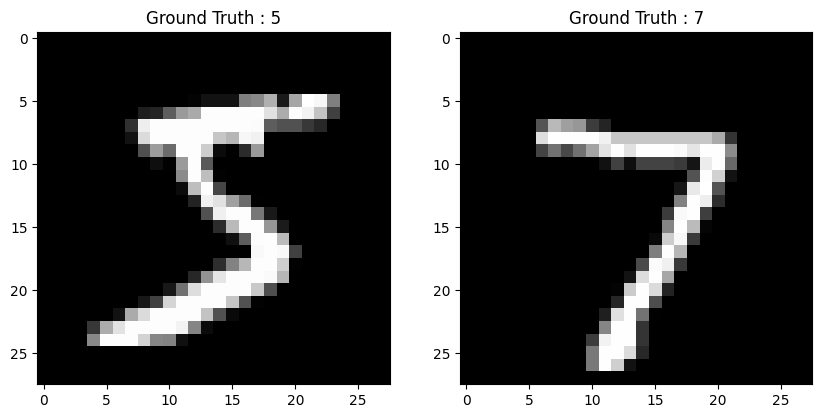

In [4]:
# let's see some sample images in the dataset

# Define the plot size
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

In [5]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [6]:
# Get the size of required 1D array

dim_data = np.prod(train_images.shape[1:])
print(dim_data)

784


In [7]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [8]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [9]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
# Define the model

model = Sequential() # type of model

# Define the model layers

model.add(Dense(256, activation='relu', input_shape=(dim_data,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [12]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=512, epochs=20, verbose =1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6361 - loss: 8.7601 - val_accuracy: 0.8619 - val_loss: 0.5885
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8766 - loss: 0.5075 - val_accuracy: 0.9041 - val_loss: 0.4109
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9188 - loss: 0.3139 - val_accuracy: 0.9217 - val_loss: 0.3170
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9358 - loss: 0.2363 - val_accuracy: 0.9290 - val_loss: 0.2998
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9499 - loss: 0.1815 - val_accuracy: 0.9315 - val_loss: 0.2928
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9567 - loss: 0.1537 - val_accuracy: 0.9411 - val_loss: 0.2512
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9670 - loss: 0.1118 - val_accuracy: 0.9477 - val_loss: 0.2398
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9693 - loss: 0.1065 - val_accu

## Evaluate the model

In [13]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9526 - loss: 0.2675
Evaluation result on Test Data : Loss = 0.2269349843263626, accuracy = 0.9610999822616577


## Run the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Probability of all the classes: [[3.1709492e-15 2.9252119e-12 9.9766928e-01 1.2290732e-03 6.2270838e-15
  1.2161091e-12 2.8406919e-11 1.3406548e-05 3.3327517e-21 1.0882630e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Model prediction: 2


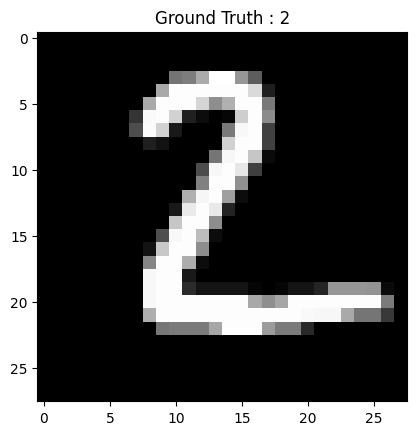

In [14]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])),axis=1))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Probability of all the classes: [[3.2931560e-14 9.5029036e-04 4.9775178e-03 4.4818220e-15 9.9372840e-01
  2.2240725e-08 1.7755340e-08 1.0617786e-07 3.4367215e-04 8.2427594e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Model prediction: 4


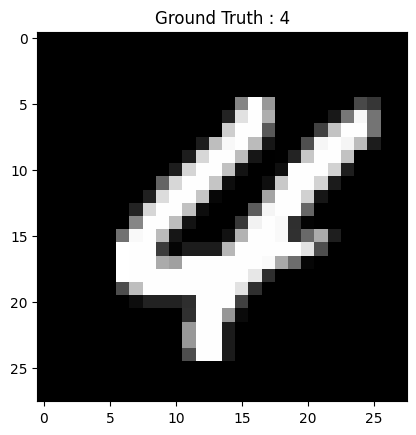

In [15]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[9008]])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[9008]])),axis=1))

# Display the predicted image
plt.imshow(test_images[9008], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[9008]))
plt.show()

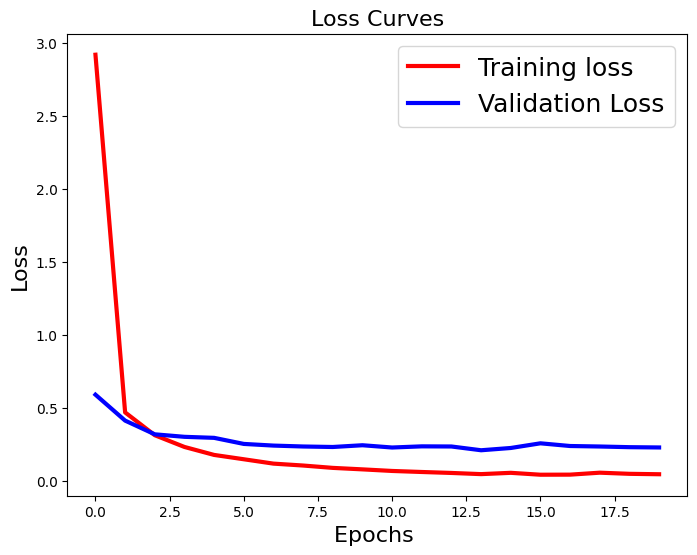

In [16]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

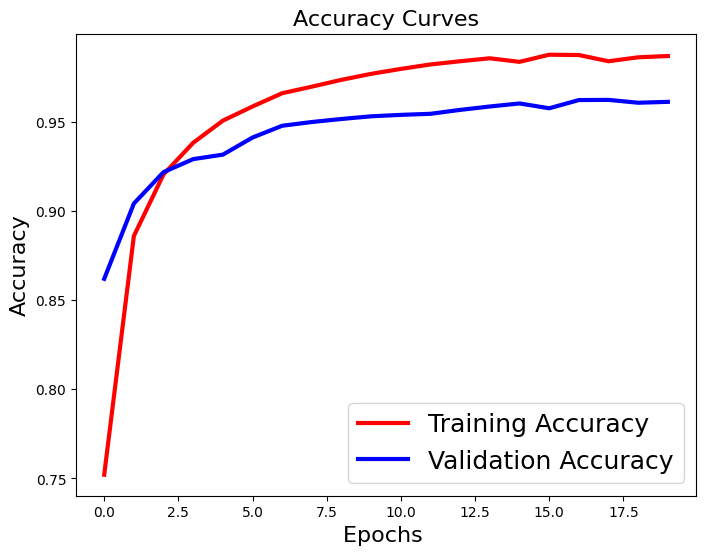

In [17]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [18]:
DIGITS = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
}

In [19]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([DIGITS[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([DIGITS[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [20]:
print(confusion_matrix(test_labels_one_hot, model.predict(test_data)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Pred    0     1    2    3    4    5    6    7    8    9
True                                                   
0     969     0    3    1    1    1    3    0    1    1
1       0  1118    0    4    1    0    2    1    9    0
2       3     2  986   18    2    3    0    3   13    2
3       0     0    6  972    1   16    0    5    4    6
4       0     0    3    1  945    0    7    3    3   20
5       3     0    0   17    3  844    7    2    7    9
6       8     3    2    1    5   11  921    0    4    3
7       1     5    8    6    4    1    0  989    1   13
8       6     1    8   10    4   15    5    5  908   12
9       3     3    3    7   12   11    3    7    1  959


## Classification report

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:

y_true = np.argmax(test_labels_one_hot, axis=1)
y_pred = np.argmax(model.predict(test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
report = classification_report(y_true, y_pred,digits=4)

In [24]:
print(report)

              precision    recall  f1-score   support

           0     0.9758    0.9888    0.9823       980
           1     0.9876    0.9850    0.9863      1135
           2     0.9676    0.9554    0.9615      1032
           3     0.9373    0.9624    0.9497      1010
           4     0.9663    0.9623    0.9643       982
           5     0.9357    0.9462    0.9409       892
           6     0.9715    0.9614    0.9664       958
           7     0.9744    0.9621    0.9682      1028
           8     0.9548    0.9322    0.9434       974
           9     0.9356    0.9504    0.9430      1009

    accuracy                         0.9611     10000
   macro avg     0.9607    0.9606    0.9606     10000
weighted avg     0.9612    0.9611    0.9611     10000



In [25]:
print(accuracy_score(y_true, y_pred))

0.9611
